In [10]:
import experimentation as exp
operators = [10,20,30,50,60,70]
p_min = 0.001
alpha = 0.3
beta = 0.1
target_cut = 2
max_cpu_time=10*60
best_cut, stats = exp.experiment_adaptive_cpu_time(operators, max_cpu_time, p_min, alpha, beta,target_cut)

Running Adaptive ILS for 600 seconds...
ILS - CPU Time: 600. Best Cut: 21.
Adaptive ILS - CPU Time: 600. Best Cut: 21.


/var/folders/lm/8m47310n0sbc6d8tdlxcd8pw0000gn/T/ipykernel_69551/2579686188.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(cut_sizes, labels=labels)


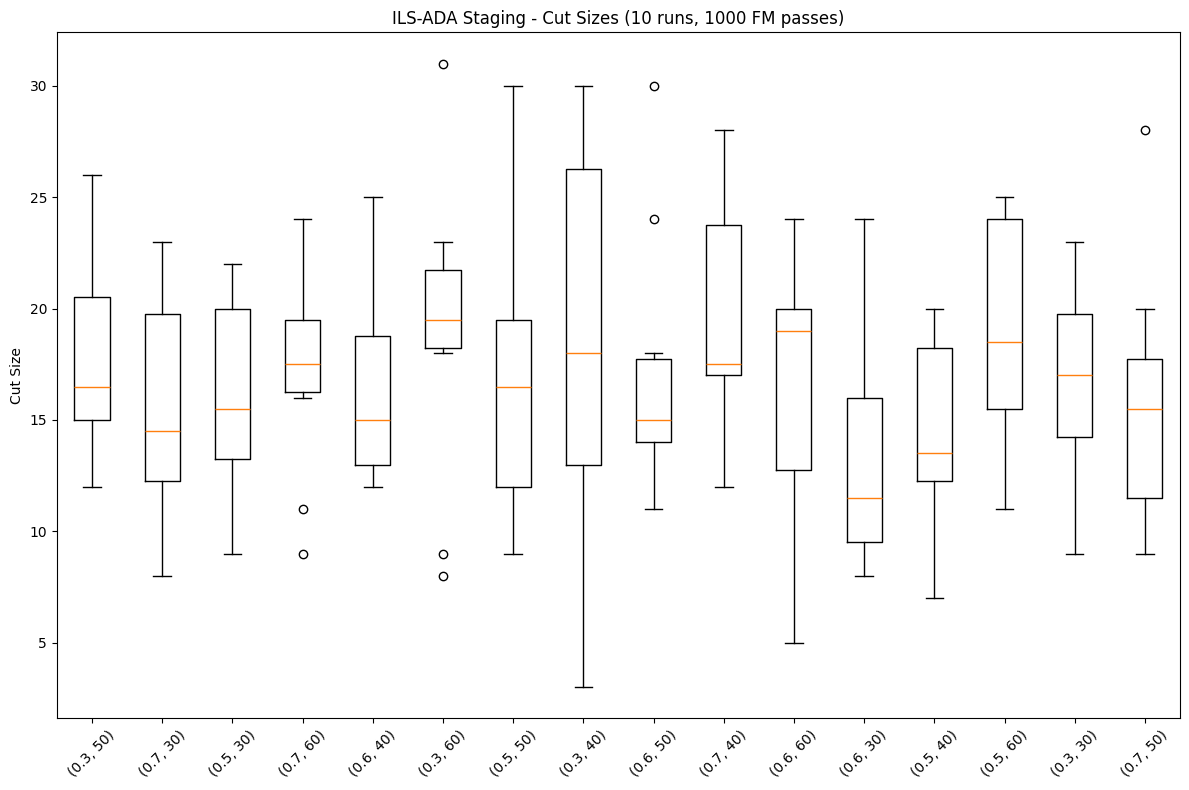

In [1]:
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import ils_adaptive as ila
from matplotlib.lines import Line2D

folder = "pckl/ils-ada-staging-search"
results = ila._load_results_from_folder(folder)

labels = []
cut_sizes = []
cut_means = []
bests = []
for trial in results:
    #10 rows in each trial
    stage_threshold = trial[0][1]["threshold"]
    stage_cut = trial[0][1]["stage_cut"]
    labels.append(f"({stage_threshold}, {stage_cut})")
    best_cuts =[i[0] for i in trial]
    cut_sizes.append(best_cuts)
    cut_means.append(np.mean(best_cuts))
    best_cut = min(best_cuts) 
    bests.append(best_cut)
    pass

#box plots
fig, ax = plt.subplots(figsize=(12, 8))
bp = ax.boxplot(cut_sizes, labels=labels)
plt.title("ILS-ADA Staging - Cut Sizes (10 runs, 1000 FM passes)")
plt.ylabel("Cut Size")

#LLM Prompt: Mark the max and min values of each box on the plot.
# for i, data in enumerate(cut_sizes):
#     min_val = min(data)
#     max_val = max(data)
    
#     # Position the text labels for min and max values
#     ax.text(i+1.15, min_val, f'{min_val}', 
#             verticalalignment='center', fontsize=8, color='blue')
#     ax.text(i+1.15, max_val, f'{max_val}', 
#             verticalalignment='center', fontsize=8, color='red')

# # Rotate the x-axis labels vertically for better readability
plt.xticks(rotation=45)

# # Add a legend for the min/max annotations
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Maximum'),
#     Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Minimum')
# ]
# ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout to make room for the annotations
plt.tight_layout()
plt.show()

Cut size / step analysis

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


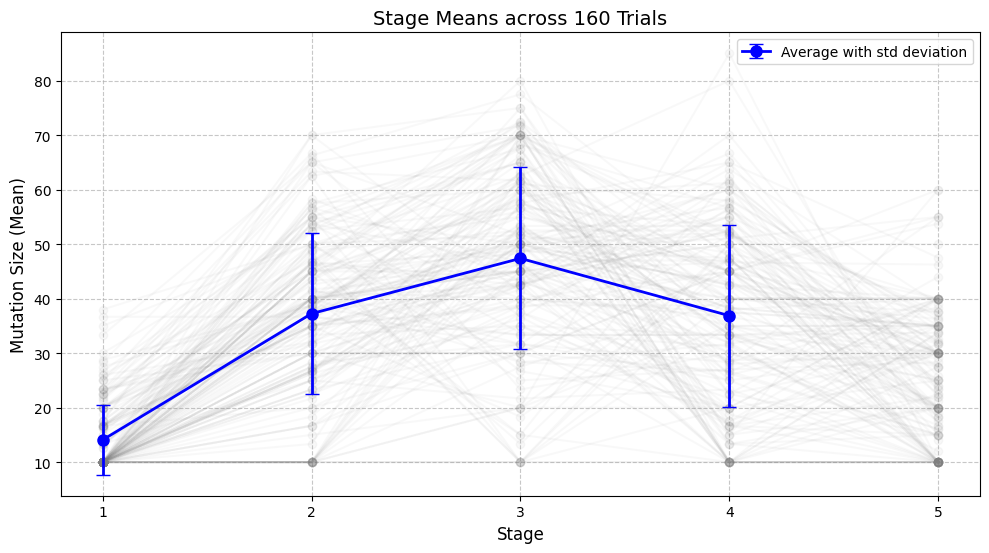

In [2]:
#you need to run the previous block.
import utils

folder = "pckl/ils-ada-staging-search"
results = ila._load_results_from_folder(folder)

labels = []
sequences = []

for trial in results:
    #10 rows in each trial    
    for r in trial:
        sequences.append(r[2])

phase_means = []
for se in sequences:
    means, phases = utils.compact_to_blocks(se,5,2)
    assert 5 == len(means)
    phase_means.append(means)   

import matplotlib.pyplot as plt
import numpy as np

utils.generate_mutation_size_trend_chart(phase_means)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

ILS-ADA without staging.

/var/folders/lm/8m47310n0sbc6d8tdlxcd8pw0000gn/T/ipykernel_50485/1535536191.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(cut_sizes, labels=labels)


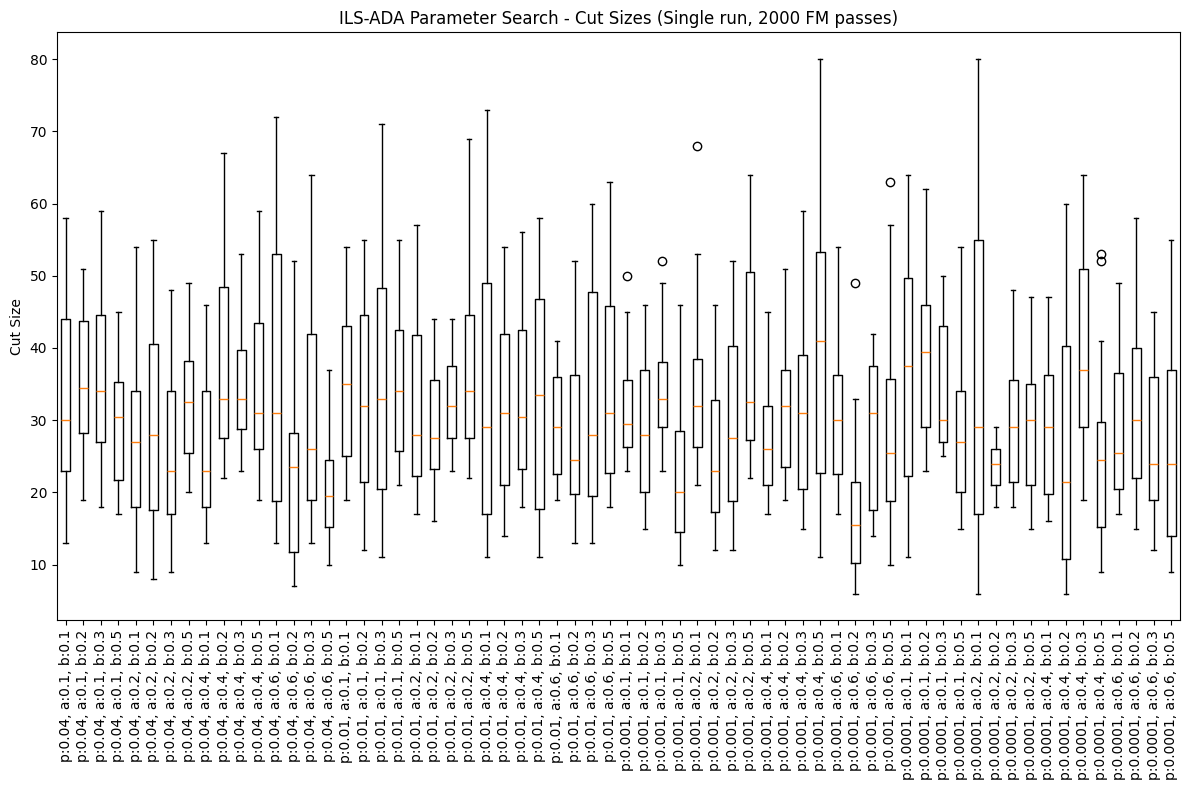

In [23]:
import utils
adares = utils.load_pickle('pckl/adaptive_strategy_research/2025-03-30_11-20-30_adaptive_ils_parameter_search_iterations-2000.pkl')

labels = []
cut_sizes = []
for test in adares:
    label = f"p:{test['p_min']}, a:{test['alpha']}, b:{test['beta']}"
    labels.append(label)
    cuts = test['sizes_cuts'][1]
    cut_sizes.append(cuts)

#box plots
fig, ax = plt.subplots(figsize=(12, 8))
bp = ax.boxplot(cut_sizes, labels=labels)
plt.title("ILS-ADA Parameter Search - Cut Sizes (Single run, 2000 FM passes)")
plt.ylabel("Cut Size")

#LLM Prompt: Mark the max and min values of each box on the plot.
# for i, data in enumerate(cut_sizes):
#     min_val = min(data)
#     max_val = max(data)
    
#     # Position the text labels for min and max values
#     ax.text(i+1.15, min_val, f'{min_val}', 
#             verticalalignment='center', fontsize=8, color='blue')
#     ax.text(i+1.15, max_val, f'{max_val}', 
#             verticalalignment='center', fontsize=8, color='red')

# # Rotate the x-axis labels vertically for better readability
plt.xticks(rotation=90)

# # Add a legend for the min/max annotations
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Maximum'),
#     Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Minimum')
# ]
# ax.legend(handles=legend_elements, loc='upper right')

# Adjust layout to make room for the annotations
plt.tight_layout()
plt.show()
